In [43]:
#Inicialización: borra todo y carga librerías (se pueden instalar fácilmente si no las tienen):
# install.packages("libreríaquequiero")

#Borra consola, variables y funciones definidas en el entorno Global
rm(list = setdiff(ls(), lsf.str()));
rm(list=lsf.str());
cat("\014")

In [44]:
#librerías
suppressMessages(library("crayon")); suppressMessages(library("ggplot2"));
suppressMessages(library("gridExtra"));suppressMessages(library("latex2exp"))
library(xtable)
library(IRdisplay)
library(repr)
#opciones de ploteo ggplot2
temajuan3 <- theme(
    legend.title = element_text(size = 20),
    panel.background = element_rect(fill = "gray93"),
    legend.box = "vertical",
    legend.direction = "vertical",
    legend.key.height = unit(0.1,"snpc"),
    legend.key.width  = unit(0.1,"snpc"),
    axis.line = element_line(size = 0.5, lineend = "square"),
    axis.ticks = element_line(size = 1, colour = "black"),
    panel.border = element_rect(size = 1, fill = NA ),
    axis.title = element_text(size = 28),
    axis.text.x  = element_text(size = 24),
    axis.text.y = element_text(size = 24),
    legend.background = element_blank(),
    legend.position = c(0.3,0.8),
    legend.key = element_blank(),
    legend.text = element_text(size = 28)
    )
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }
setwd("/home/juan/Documentos/Docencia/fexpi/")

# Carga de datos en R

## Clase anterior

La clase (fallida) anterior, vimos algunos tipos de variables de R:

+ Vectores atómicos, en sus sabores:
    + `numeric` (números con decimales)
    + `integer` (números enteros)
    + `character` (letras o palabras), denominadas `string`
    + `logical` (valores `TRUE` y `FALSE`, lógicos)
 
 
+ Matrices (`matrix`): arreglos de números en dos dimensiones (puede haber en más dimensiones, se llaman `array`, como en el caso de una foto con capas de colores)


+ Data Frames (`data.frame`): una especie de planilla con columnas que son vectores atómicos, los cuales pueden ser cada uno de una clase diferente. Estas tablas generalmente se usan para cargar datos.

## Esta clase

Habitualmente, un algoritmo de análisis de datos simple, tiene los siguientes bloques:

1. `Carga de datos`
1. `Rearreglar (formatear) los datos`
1. `Limpiar outliers, separar datos por intereses del análisis`
1. `Cálculos y modelos de probabilidad`
1. `Gráficos y representaciones visuales`
1. `Entrega parámetros`
1.  Utilizamos los parámetros para sacar conclusiones.

En esta clase nos vamos a parar en el primer ítem.

## Esta clase

Vamos a ver cómo hacer carga de datos a partir de archivos **ASCII** *(American Standard Code for Information Interchange)*, que son archivos de texto (igual que un \*.R), que tienen datos.

Los datos de los archivos ASCII pueden salir de cualquier lado:

+ Una base de datos en internet.

+ Un equipo de medida caro.

+ Una arduino con un sensor.

+ Mil millones de formas que no explicitamos acá.

En principio un data.frame puede tener, dentro de los límites de definición de la variable, cualquier formato. Sin embargo, a fines de hacer cuentas y gráficos hay algunas ***formas estándar*** de formatear el data.frame. Una de ellas (la que vamos a ver acá) es ***tidy*** data, que in inglishhh quiere decir datos ***ordenados***.

Luego vamos a ver una primera aproximación a gráficos y a ajuste lineal, pero sólo un gustito.

### Sobre el formato de los data sets

Es conocido en el mundo del análisis de datos que, para data sets grandes, es **importante** tener los datos ordenados de alguna manera estándar. Esto es debido a que, tener datos bien ordenados, nos permite:

+ No cometer errores de cálculo o graficación.

+ Procesar fácilmente los datos (arreglos difíciles pueden hacer que el código sea extremadamente lento): si bien no nos tenemos que preocupar para unos pocos datos, si tienen varios gigas de datos esto tiene su importancia.

+ Tener una estructura o semántica entendible para terceros.

+ Escribir algoritmos estandarizados para leer y procesar datos.

### Sobre el formato de los data sets

Otro de los puntos a tener en cuenta es que, si los arreglos de datos en los archivos de texto son muy complicados, enrevesados o no están en algún formato estándar, entonces puede ser muy difícil ordenarlos:

<div class="alert alert-block alert-danger">
<b>"el 80% del tiempo se gasta en ordenar datos".</b> Lo que parece simple siempre complica.
</div>

# Ejemplo 1: Cargando un archivo de datos del celu

### a. Origen de los datos

Medimos un conjunto de datos que provienen del celu:

+ Una app del cel se encarga de ***loggear***(!) (***registrar*** en puridad castellana), muchos datos del acelerómetro del celular, que lo dejamos en reposo para realizar la medida.

+ Lo que tenemos es un archivo ***en el celular*** que pasaremos, usb/bluetooth mediante, a la computadora, colocándolo en alguna carpeta. En este caso:

`"/home/juan/Documentos/Docencia/fexpi/2019/Laboratorios/Laboratorio4/Datos/"`

+ El archivo se llama `00.tsv`, en este caso `tsv` quiere decir **tab separated values** ó valores separados por tabulador. Esto indica la separación de columnas de los valores en el archivo.

### b. Carga de datos

Lo primero que tenemos que hacer es indicarle al lenguaje en qué carpeta queremos trabajar, lo que se llama ***directorio de trabajo*** o working directory (wd):

In [45]:
print(      getwd()   );

[1] "/home/juan/Documentos/Docencia/fexpi"


Para setear el directorio de trabajo, utilizamos la función `setwd()` como sigue:

In [46]:
setwd("/home/juan/Documentos/Docencia/fexpi/2019/Laboratorios/Laboratorio4/Datos/") #indica un nuevo directorio

In [47]:
print(       getwd()     )

[1] "/home/juan/Documentos/Docencia/fexpi/2019/Laboratorios/Laboratorio4/Datos"


En Windows: mantener las barras normales (`Shift + 7`), no las invertidas, y usar las direcciones de Windows:

`c:/Windows/Documentos/`

### b. Carga de datos
Luego, vamos a darle una mirada a los archivos que tenemos en esta carpeta:

In [48]:
list.files()

[1] "00.tsv"         "01.tsv"         "02.tsv"         "03.tsv"        
 [5] "04.tsv"         "05.tsv"         "06.tsv"         "07.tsv"        
 [9] "08.tsv"         "09.tsv"         "10.tsv"         "11.tsv"        
[13] "12.tsv"         "13.tsv"         "angulosmed.csv" "CACO.csv"      
[17] "calibra.pdf"    "dat.csv"        "toddy.csv"      "todo.csv"

Supongamos que queremos cargar el archivo `00.tsv`
1. Lo miramos en Notepad o Gedit (acá va en R, lo que hacemos para la clase)

In [49]:
archivo <- gsub(readLines(con =  "00.tsv", n = -1), , pattern = "\"",replacement = ""); print(archivo[1:6])

[1] "1\t1569952002709\t-0.166\t0.003\t9.892\t0" 
[2] "2\t1569952002710\t-0.115\t-0.01\t9.867\t0" 
[3] "3\t1569952002711\t-0.044\t-0.002\t9.895\t0"
[4] "4\t1569952002715\t-0.027\t0.001\t9.932\t0" 
[5] "5\t1569952002731\t-0.05\t0.005\t9.909\t0"  
[6] "6\t1569952002735\t-0.09\t0.019\t9.882\t0"  


+ La estructura de columnas es: "Número de fila `tab` $t$ `tab` $a_x$ `tab` $a_y$ `tab` $a_z$, donde:

    + $t$  es el tiempo de la medida, con el relós del celu.
    + $a_{x,y,z}$  es la aceleración que registra el acelerómetro ($m/s^2$)

Lo más importante es que la estructura está separada con `tab`, que R imprime como "`\t`", pero que en notepad o gedit se ve como un espacio fijo.

### b. Carga datos
Ahora vamos a pasar desde el archivo de texto `00.tsv` a una variable en R. Vamos a usar el comando `read.csv()`, que sirve para cualquiera de los archivos de texto del tipo de `00.tsv`, sin importar su extensión (archivos de texto en gral. : *.txt, *.csv, *.dat, *.tsv, *.cualquiercosa).

In [50]:
datos <- read.csv(file = "00.tsv", sep = "\t", header = F)

+ `sep` indica el separados, entre comillas. Acá usamos el símbolo del tabulador ('`\t`'), puede ser cualquiera.
+ `header` es el argumento para indicar si el archivo tiene nombres de columnas, que no es el caso.

### c. Viendo los datos
Vemos de qué se tratan estos datos.

In [51]:
head(datos, 3); dim(datos); 

,V1,V2,V3,V4,V5,V6
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1.569952e+12,-0.166,0.003,9.892,0
2,2,1.569952e+12,-0.115,-0.010,9.867,0
3,3,1.569952e+12,-0.044,-0.002,9.895,0


[1] 5159    6

+ Tienen 6 columnnas y 5159 observaciones.
+ La primer columna (1) **no** tiene sentido (multiplica los entes sin necesidad, al decir de Occam)
+ La última columna (6) tampoco tiene sentido, así es que la sacamos tb

In [52]:
head(datos, 3)  #sirve para mirar la cabeza de un dataframe

,V1,V2,V3,V4,V5,V6
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1.569952e+12,-0.166,0.003,9.892,0
2,2,1.569952e+12,-0.115,-0.010,9.867,0
3,3,1.569952e+12,-0.044,-0.002,9.895,0


In [53]:
datos <- datos[ , c(-1,-6)]; head(datos, 3) #saca la primera y la sexta columna

,V2,V3,V4,V5
,<dbl>,<dbl>,<dbl>,<dbl>
1,1.569952e+12,-0.166,0.003,9.892
2,1.569952e+12,-0.115,-0.010,9.867
3,1.569952e+12,-0.044,-0.002,9.895


Es importante ver que la clase de cada columna sea la correcta. Siempre hay problemas de "no me anda y no se por qué"...y el problema es la clase de la columna. Acá son todos `dbl` que quiere decir `numeric`. En principio está todo bien.

### d. Arreglando un poco los datos y graficando

Por cuestiones de comodidad, le vamos a poner nombres a las columnas, para sacarles los nombres genéricos $V_i$

In [54]:
head(datos, 3) #muestra 3 líneas del dataframe
colnames(datos) <- c("t", "ax", "ay", "az");#define nombres de columnas
head(datos, 2); #muestra 3 líneas con nuevos nombres de columnas

,V2,V3,V4,V5
,<dbl>,<dbl>,<dbl>,<dbl>
1,1.569952e+12,-0.166,0.003,9.892
2,1.569952e+12,-0.115,-0.010,9.867
3,1.569952e+12,-0.044,-0.002,9.895


,t,ax,ay,az
,<dbl>,<dbl>,<dbl>,<dbl>
1,1.569952e+12,-0.166,0.003,9.892
2,1.569952e+12,-0.115,-0.010,9.867


Y como no nos importan los valores de tiempo absoluto, le vamos a dejar en cero el primer valor de la columna, restándole a toda la columna el primer valor

In [55]:
datos$t <- datos$t - datos$t[1]; head(datos, 2); range(datos$t)

,t,ax,ay,az
,<dbl>,<dbl>,<dbl>,<dbl>
1,0,-0.166,0.003,9.892
2,1,-0.115,-0.010,9.867


[1]     0 51556

### d. Arreglando los datos y graficando
Por último, los datos de tiempo están en milisegundos, así es que vamos a pasarlos a segundos, dividiendo por mil

In [56]:
datos$t <- datos$t/1000; head(datos, 10); range(datos$t)

,t,ax,ay,az
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.000,-0.166,0.003,9.892
2,0.001,-0.115,-0.010,9.867
3,0.002,-0.044,-0.002,9.895
4,0.006,-0.027,0.001,9.932
5,0.022,-0.050,0.005,9.909
6,0.026,-0.090,0.019,9.882
7,0.039,-0.128,-0.134,9.868
8,0.046,-0.128,-0.002,9.893
9,0.057,-0.123,0.018,9.893


[1]  0.000 51.556

### d. Arreglando los datos y graficando

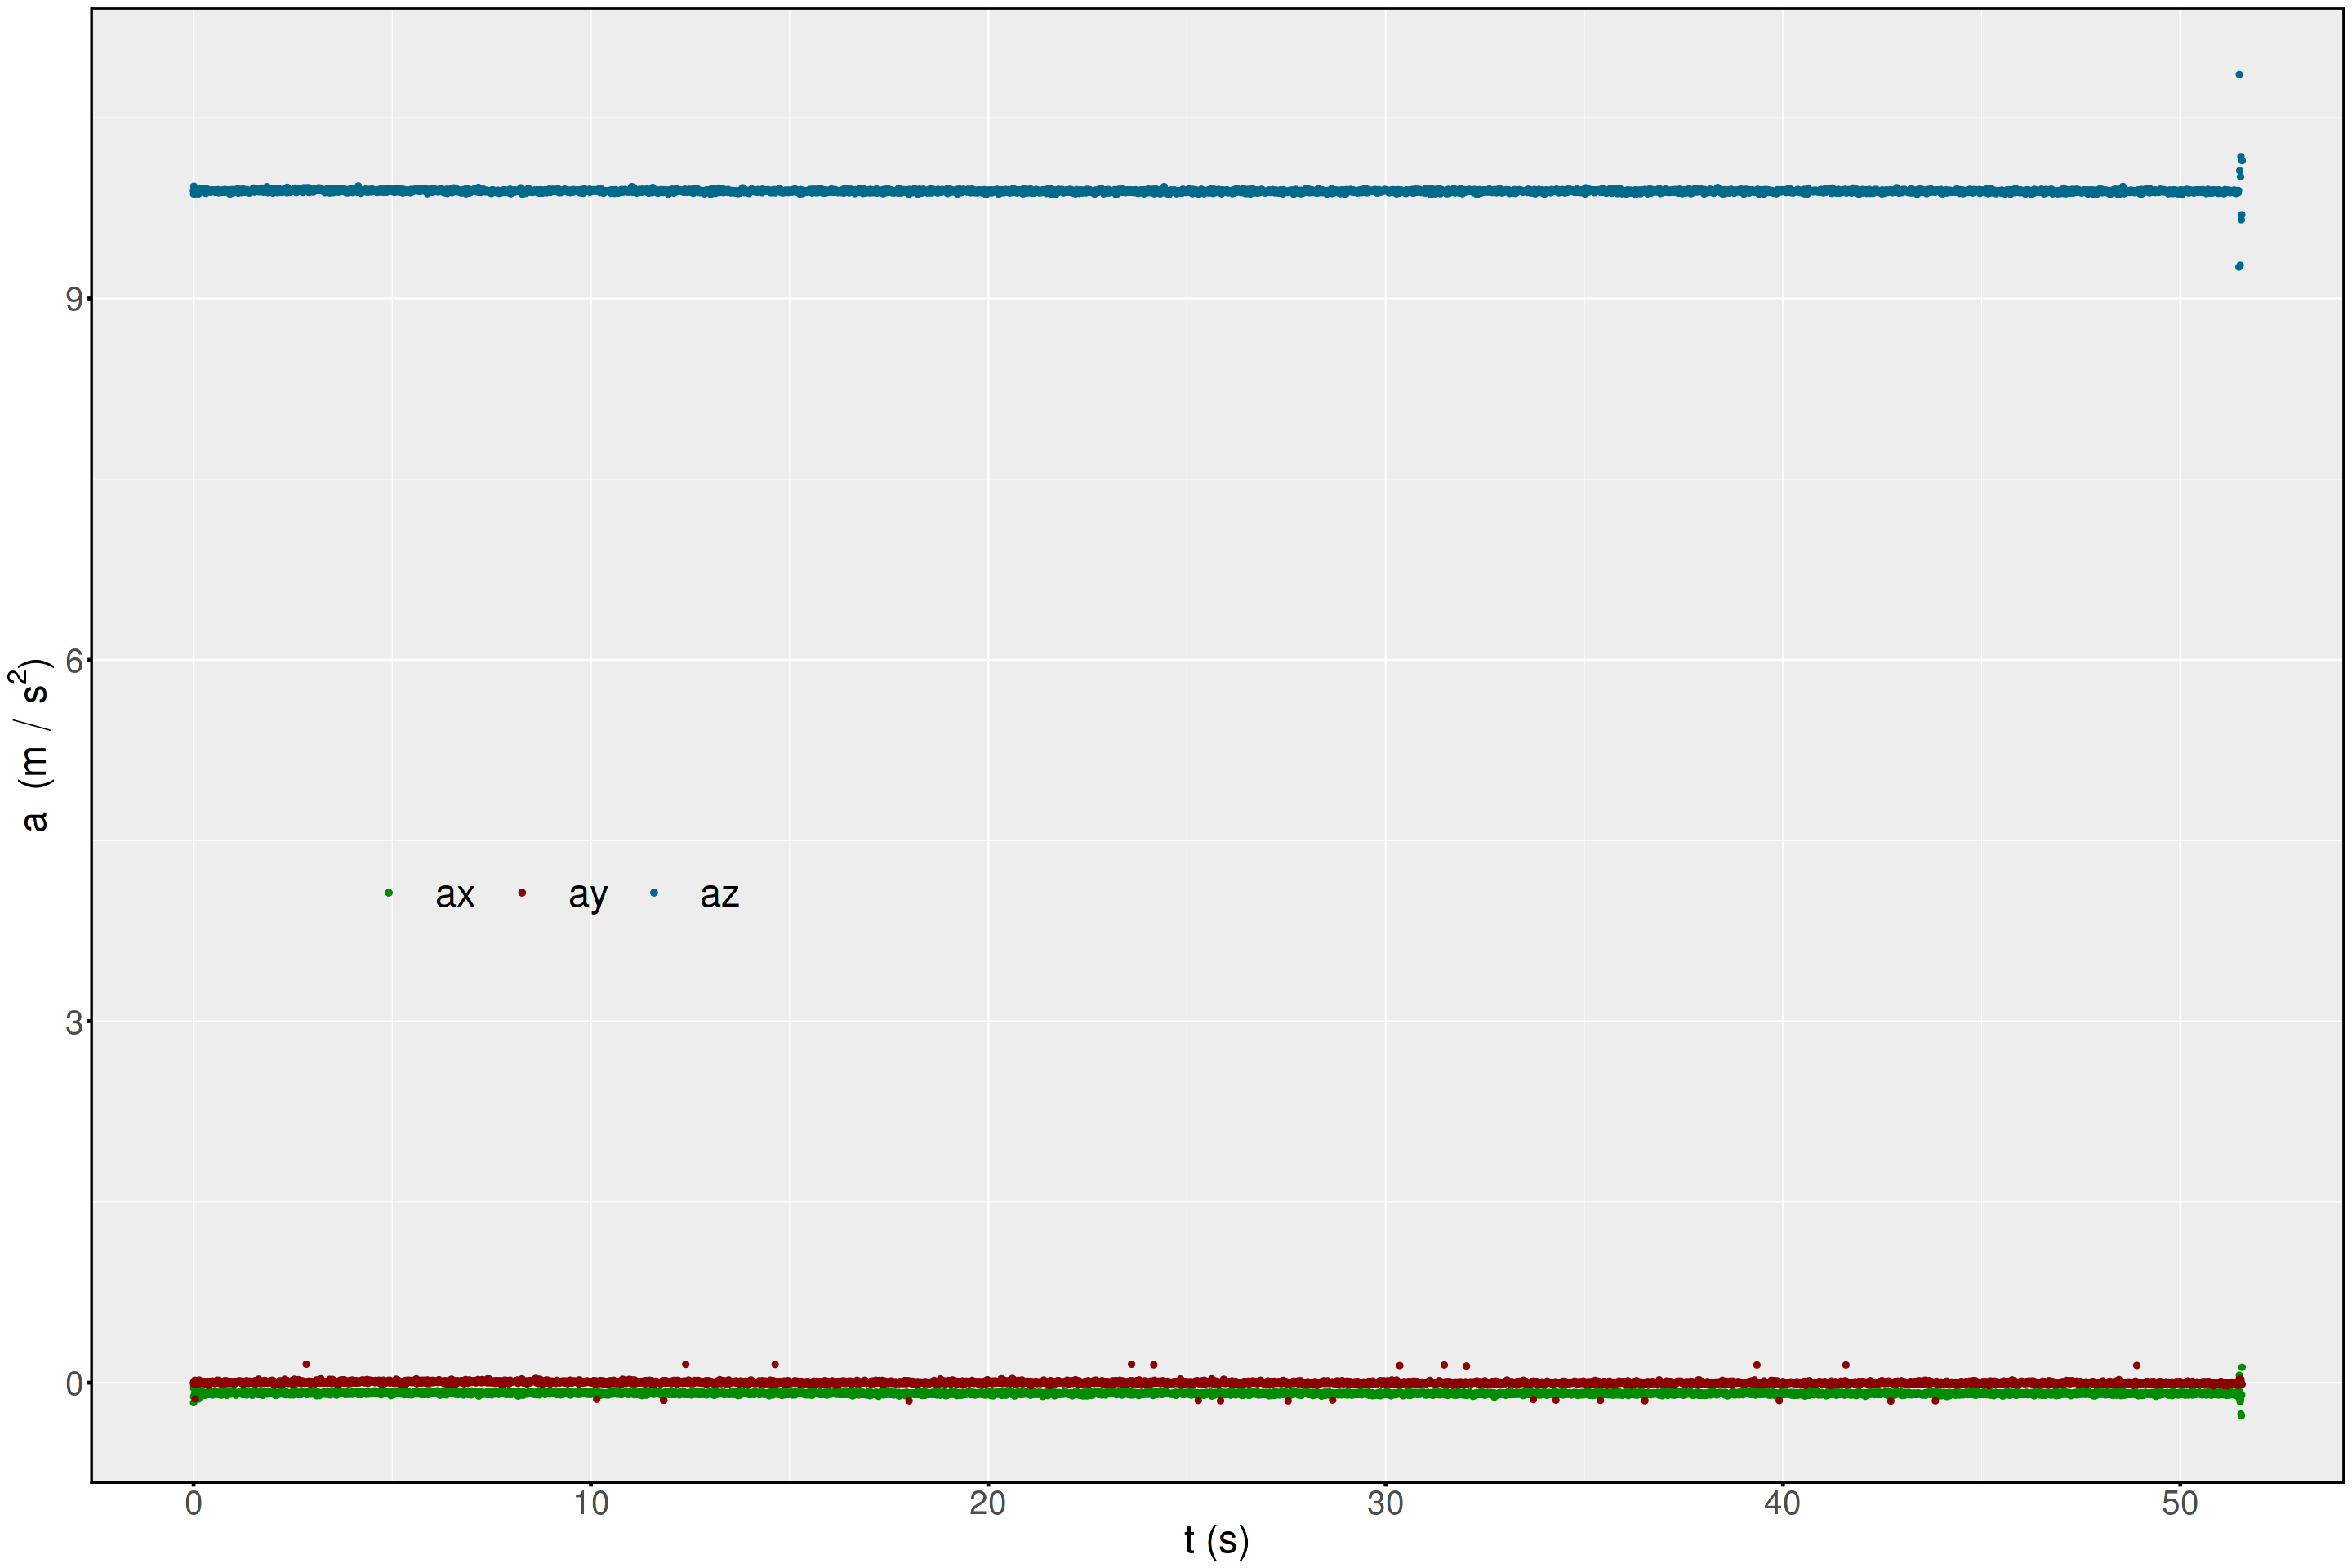

In [58]:
library(ggplot2); source("/home/juan/Documentos/Rfunj/letrasgrandes.R")
ga <- ggplot(data = datos) +
geom_point(aes(x = t, y = ax, colour = "ax")) + 
geom_point(aes(x = t, y = ay, colour = "ay")) +
geom_point(aes(x = t, y = az, colour = "az")) +
ylab(TeX("$a \\; (m\\, / \\,s^2)$")) + xlab("t (s)") + 
scale_colour_manual(values = c("ax" = "green4", "ay" = "red4", "az" = "Deepskyblue4" ),name = NULL) +
temajuan3  + theme(legend.position = c(0.2,0.4), legend.direction = "horizontal")
fig(width = 24,heigth = 16); show(ga)

+ El gráfico se ve muy bien, casi toda la gravedad está representada en $a_z$.

+ Cada una de las series temporales tiene ***outliers*** (puntos que están fuera), pero eso no tiene importancia ahora.

# Ejemplo 2: negación de la negación

Vamos a utilizar dos ***series temporales*** de datos que descargamos de internet:

   1. `TA.csv`, es la anomalía de temperatura anual global a lo largo del tiempo, es decir, el cambio de temperatura media global con respecto a la media de los años 1950-1980. Es una cuenta *muy complicada* que hace la __[NASA](https://climate.nasa.gov/vital-signs/global-temperature/)__ teniendo en cuenta todas las estaciones meteorológicas disponibles y con muchos requerimientos estadísticos de los cuales nada sabemos (hay muchas publicaciones)
   
   1. `merged-ice-core-yearly.csv`, es el registro medido de $CO_2$ (dióxido de carbono) en atmósfera de los últimos ***dos mil años***. Los datos están sacados de distintas fuentes, ordenados y mezclados para nos por __[UC San Diego](https://scrippsco2.ucsd.edu/data/atmospheric_co2/icecore_merged_products.html)__

### ¿Qué son estos datos?
El dióxido de carbono es el principal gas de efecto invernadero, que aumenta, entre otras razones, por el aumento de la quema de combustibles fósiles. La serie temporal consiste en ***medias anuales*** que van desde el año 13 después de Cristo, hasta el año 2018 (año en el que bajé la serie temporal). También hay un dataset que viene con R, que es la misma curva pero con resolución ***mensual*** y permite ver los detalles de la concentración a lo largo del año (si quieren ver la variable escribir en la consola `co2`, datos mensuales desde 1957 hasta 1997).

**Nota**: Nadie pudo medir dióxido de carbono en atmósfera en el año 13 después de Cristo...se mide dióxido de carbono en aire atrapado en tubos de hielo, que pueden ser datados mediante $^{14}C$...con lo que se obtiene un registro desde el año 13. Luego de 1958, es la **Curva de Keeling**, un famoso científico que se midió el aumento de la concentración de dióxido de carbono en atmósfera.

**Click para ir a YouTube: Curva de Keeling**
<a href="http://www.youtube.com/watch?feature=player_embedded&v=Z43FQCSg4Ow
" target="_blank"><img src="http://img.youtube.com/vi/Z43FQCSg4Ow/0.jpg" 
alt="IMAGE ALT TEXT HERE" width="400" height="300" border="10" /></a>
**Click para ir a YouTube: Anomalía térmica de la NASA**
<a href="http://www.youtube.com/watch?feature=player_embedded&v=gXXOkhoki8s
" target="_blank"><img src="http://img.youtube.com/vi/gXXOkhoki8s/0.jpg" 
alt="IMAGE ALT TEXT HERE" width="400" height="300" border="10" /></a>

<div class="alert alert-block alert-danger">
<b>No se asusten:</b> Hagan algo.
</div>

#### 1.a Archivos de datos
Las extensiones de los archivos son `*.csv`, que quiere decir *coma separated values*.

Los archivos:

* Pueden tener información relevante sobre los datos al comienzo, como el caso de `merged-ice-core-yearly.csv`. No la saquen o borren a mano.

* Pueden tener encabezado (header) para el nombre de las columnas.

<div class="alert alert-block alert-danger">
<b>
Siempre es bueno mirar los archivos que queremos cargar en R para ver qué opciones usar a la hora de la carga.
</b>
</div>

* Mejor hacerlo con Notepad (Windows) o Gedit (Linux), o cualquier editor de texto plano.

* Acá lo voy a hacer con R, para que quede en este apunte.

#### 1.a Archivos de datos
* Lo primero que haremos es *poner los archivos en una carpeta o directorio*.
* Luego, vamos a *decirle* al lenguaje el ***directorio de trabajo*** que en inglés es <b>w</b>orking  <b>d</b>irectory (**wd**). En R el comando es `setwd("ruta")`

In [59]:
# IMPORTANTE: definir el "Working Directory" (directorio de trabajo): escribimos dónde están nuestres archives de datos.
setwd("/home/juan/Documentos/Docencia/fexpi/2020/NTB/2.rcargadatos/Datos/")
#NOTA: en windows se mantienen las barras "/", por ejemplo: setwd("d:/archivos/archivosR/")
#Para ver que funciona:
getwd()

[1] "/home/juan/Documentos/Docencia/fexpi/2020/NTB/2.rcargadatos/Datos"

In [60]:
#ahora vemos el merged-ice-core-yearly.csv/ parámetro n = -1 : lee todas las líneas del archivo
archivo <- gsub(readLines(con =  "merged-ice-core-yearly.csv", n = -1), , pattern = "\"",replacement = "")

#### 1.a Archivos de datos: una miradita para ver cómo cargarlos

In [61]:
print(archivo[1:40])

 [1] "-------------------------------------------------------------------------------------------"   
 [2] "  Atmospheric CO2 record based on ice core data before 1958,                               "   
 [3] "  (Ethridge et. al., 1996; MacFarling Meure et al., 2006) and                              "   
 [4] "  yearly averages of direct observations from Mauna Loa and the South Pole after and       "   
 [5] "  including 1958 (from Scripps CO2 Program).                                               "   
 [6] "                                                                                           "   
 [7] "  in situ data is based on simple average of Mauna Loa and South Pole from values on Jan 1 "   
 [8] "                                                                                              "
 [9] "  For Mauna Loa Observatory, Hawaii: Latitude 19.5°N Longitude 155.6°W Elevation 3397m     "   
[10] "  For South Pole: Latitude 90.0°S Elevation 2810m                           

#### 1.a Archivos de datos: una miradita para ver cómo cargarlos

* `merged-ice-core-yearly.csv` tiene **26** líneas de explicaciones sobre los datos

* Estas líneas es mejor que no las borren si trabajan con datos provenientes de un mega estudio (como este) o un equipo comprado:
     * Tienen info sobre la medida o los datos(en este caso publicaciones).
     * Esa info puede servir para marcar el origen de los datos, condiciones de medida, etc(en este caso georeferencia de los labos).
     * Si la pierden, y usan muchos archivos de origen, entonces se mezclan cosas que tal vez no tengan nada que ver.
     
* Luego una línea sin nada y comienzan los datos...son dos columnas, separadas por un punto y coma " **;** ":
     * La primera columna es el año (**Y**) in inglich.
     * La segunda es la concentración de $CO_2$ en atmósfera, para cada año, "**CO2**".
      

#### 1.b Carga de datos provenientes del archivo en una variable

In [62]:
diox <- read.csv(file = "merged-ice-core-yearly.csv", header = T, sep = ";", skip = 26)

El comando `read.csv()` (leer csv) nos permite leer un archivo de texto (que esté en formato ASCII) y pasarlo a una variable (un data.frame). Tenemos que que indicarle:

* Cuántas líneas debemos ***saltear*** antes de empezar a leer datos (acá n = 26 líneas). `skip = 26`

* Cómo están separadas las columnas de datos, punto y coma en este caso ("**;**"): `sep = ";"` 

* Si cada columna tiene un nombre: `header = T`

#### 1.c Miramos la variable `diox` (siempre) para ver que todo está como queremos. 

In [64]:
head(diox, 3); tail(diox,3);nrow(diox)

,Y,CO2
,<int>,<dbl>
1,13,276.75
2,29,277.88
3,56,277.38


,Y,CO2
,<int>,<dbl>
166,2016,400.78
167,2017,403.58
168,2018,405.63


[1] 168

Vemos que:
* La columna **Y** es de clase `int`, lo cual está perfecto, porque los años son enteros (`int`egers)

* La columna **CO2** tiene clase `dbl` que es  ***double precision*** (`numeric`), y está también perfecto Las unidades son ***ppm*** (es <b>p</b>artes <b>p</b>or <b>m</b>illón), que es una forma de expresar concentración.

#### 1.d Cargando la anomalía térmica

In [65]:
at <- read.csv("TA.csv", sep = ",", header = T); head(at,5) #cada une mira cómo hacerlo

,Year,TA
,<int>,<dbl>
1,1880,-0.19
2,1881,-0.10
3,1882,-0.10
4,1883,-0.19
5,1884,-0.28


#### Ya tenemos dos variables. Vamos a verlas

* El paquete base (hay muchos...ggplot2 es el que yo uso habitualmente) de graficación de R es `plot(x,y)`, donde `x` e `y` son vectores (lo veremos en detalle después). Puede graficar:

     * Puntos (habitualmente llamados scatter plot)
     * Líneas: curvitas, rectas, etc.
Es importante, para graficar, que el gráfico sea ***entendible*** para terceros:
* Ejes con nombre de variable y unidades entre paréntesis, por ejemplo: Anomalía Térmica (°C)
* Puntos para datos experimentales. Líneas para modelos o ajustes.
* Diferentes símbolos para diferenciar datos diferentes: si queremos graficar dos anomalías térmicas (por ejemplo, una representativa del polo Norte y otra del Sur), es importante que puedan ser diferenciadas y tengan leyenda.
* No agregar variables extras (colores, tamaños de punto, etc) a menos que sea necesario para mostrar más variables.

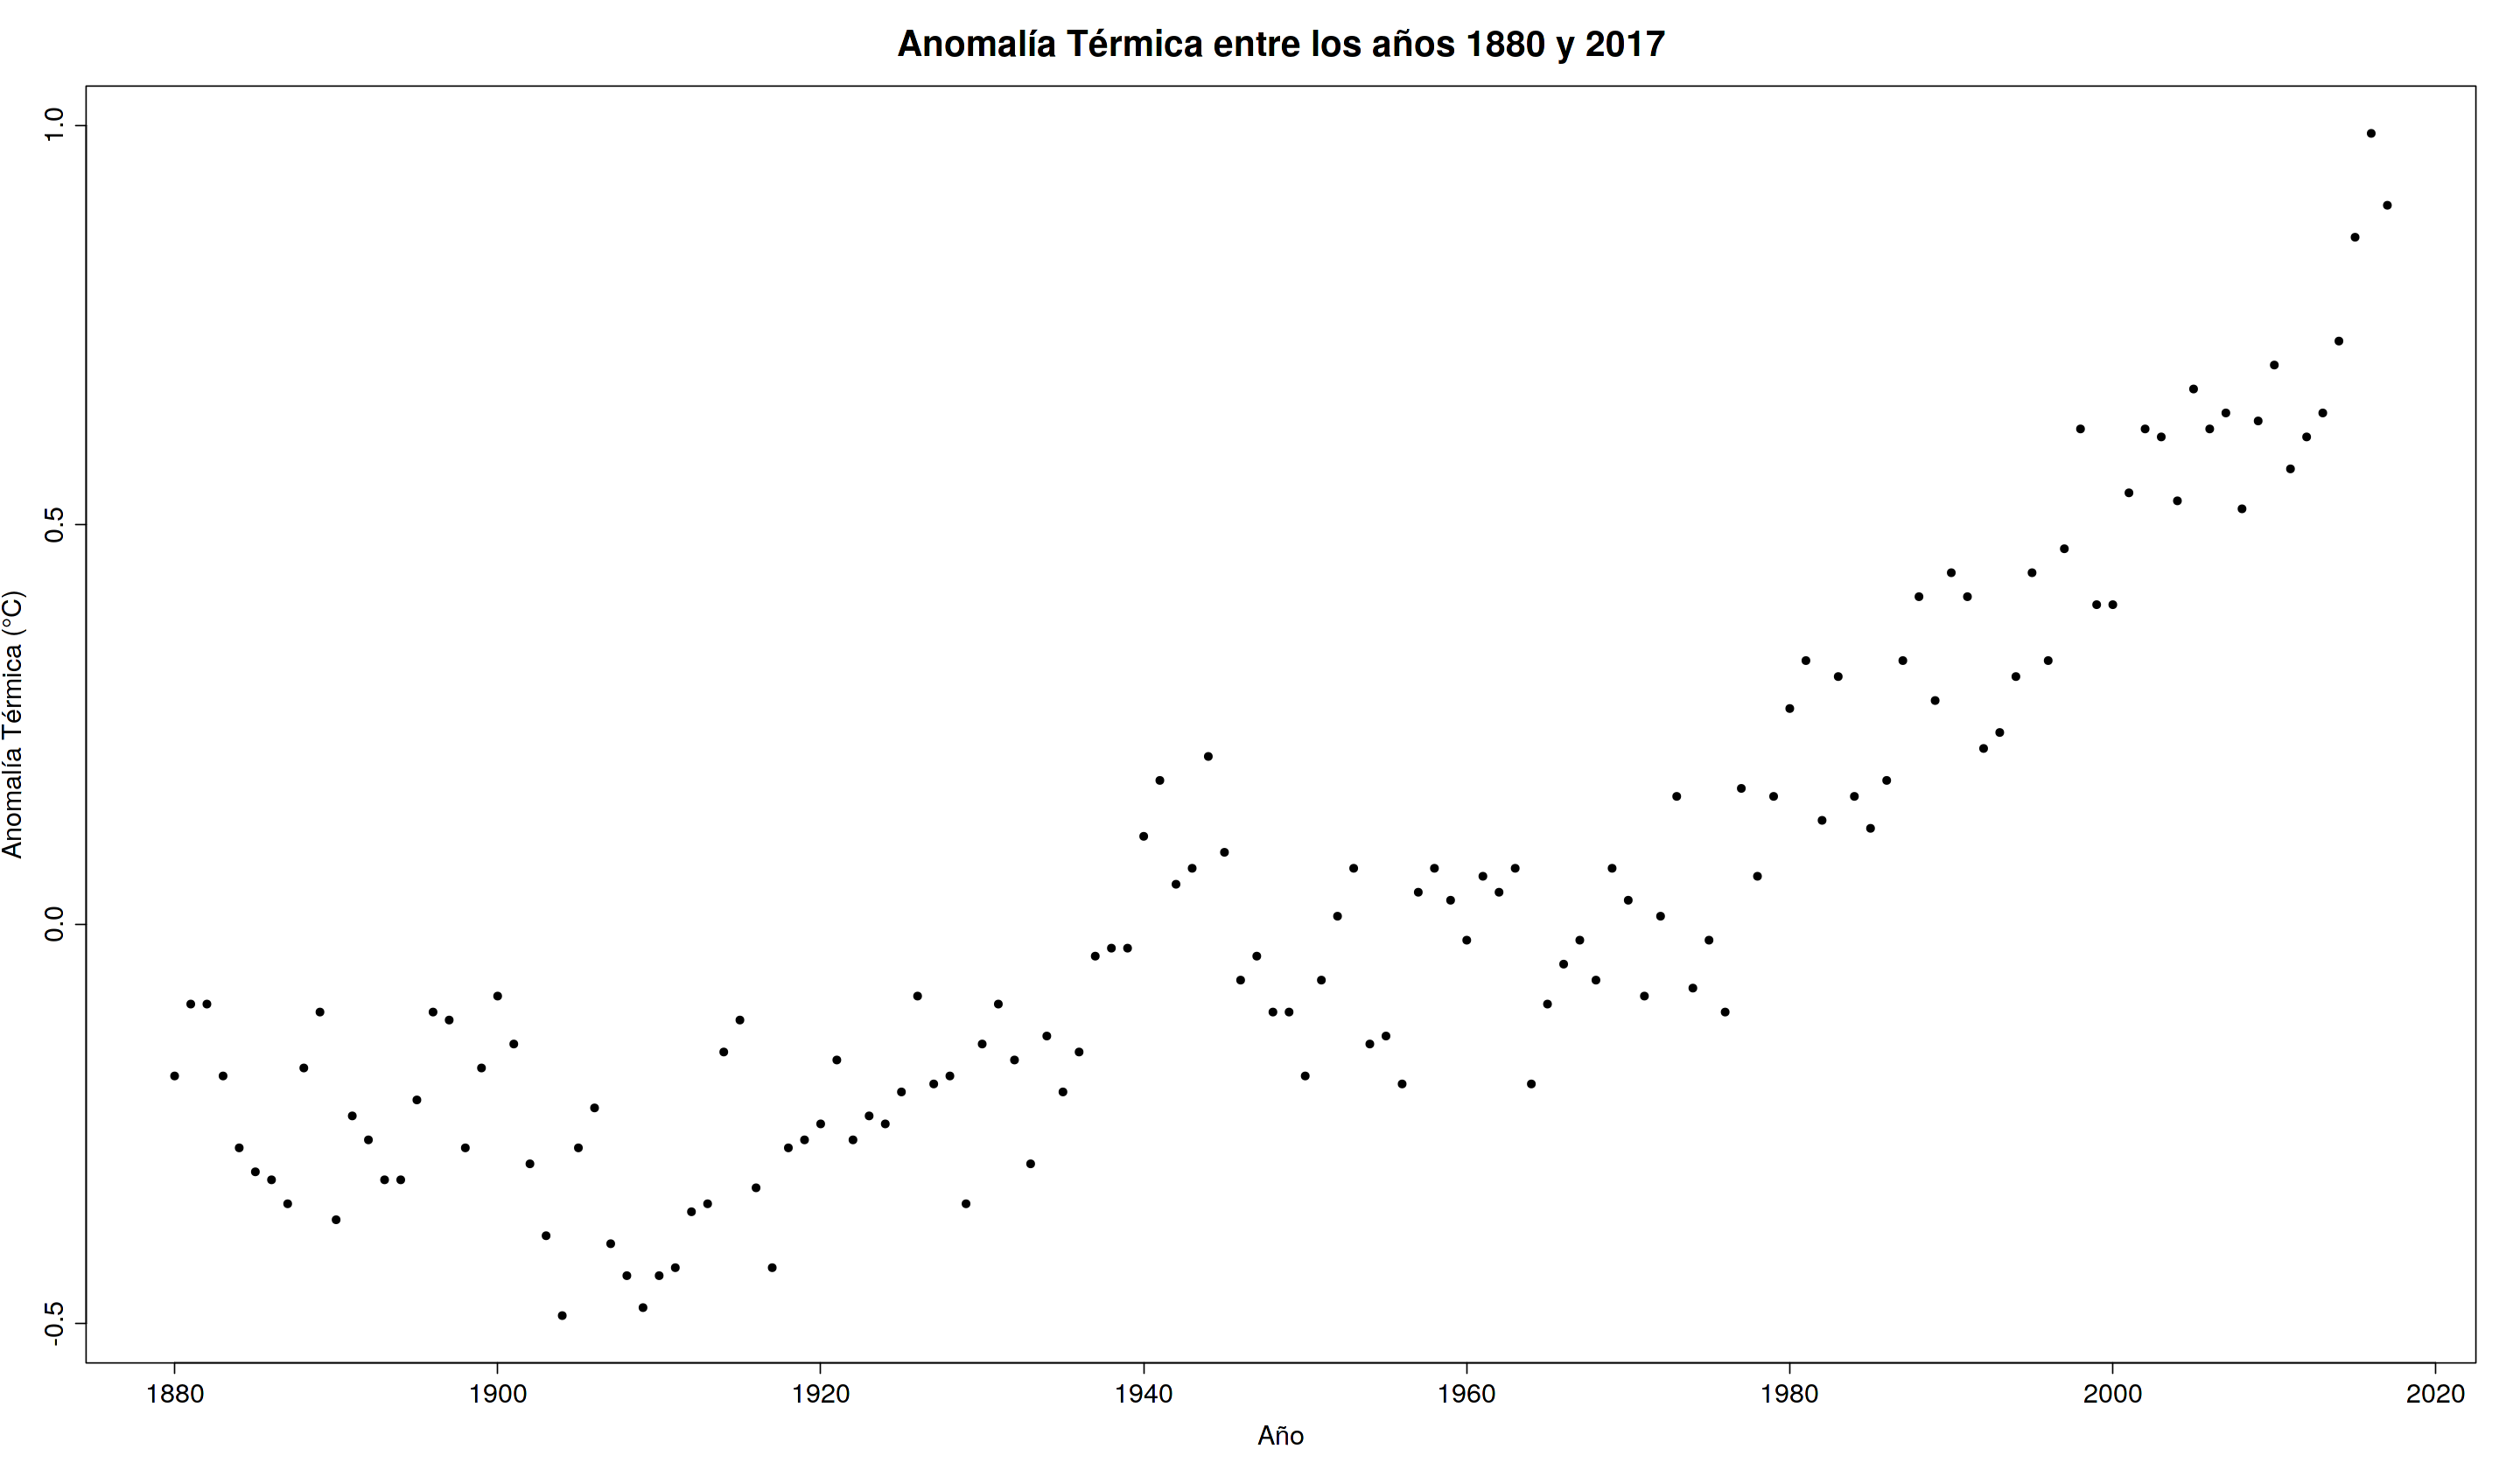

In [66]:
#PLOT anomalía térmica:
fig(width = 24,heigth = 14) #cosa del Jupyter para que muestre más grande el gráfico
plot(x = at$Year, y =  at$TA, main = "Anomalía Térmica entre los años 1880 y 2017", #main; título del gráfico
    xlab = "Año", #título eje x
    ylab = "Anomalía Térmica (°C)", #ídem y
    pch = 16, # símbolo de punto
    cex = 1, #tamaño de punto
    cex.axis = 1.5,
     cex.lab = 1.5,
     cex.main = 2
    )

Vemos que:
* La anomalía térmica aumenta, lo que quiere decir que la Tierra está subiendo la temperatura media.
* El aumento no es lineal en el tiempo.
* Cambio Climático, *Climate Change...There's no such a thing*, dicen los negadores (no son *giles*, dicen que la estadística para calcular cada uno de los puntos es mentirosa, además, están muy bien financiados).

Ahora con el dióxido de carbono en atmósfera.

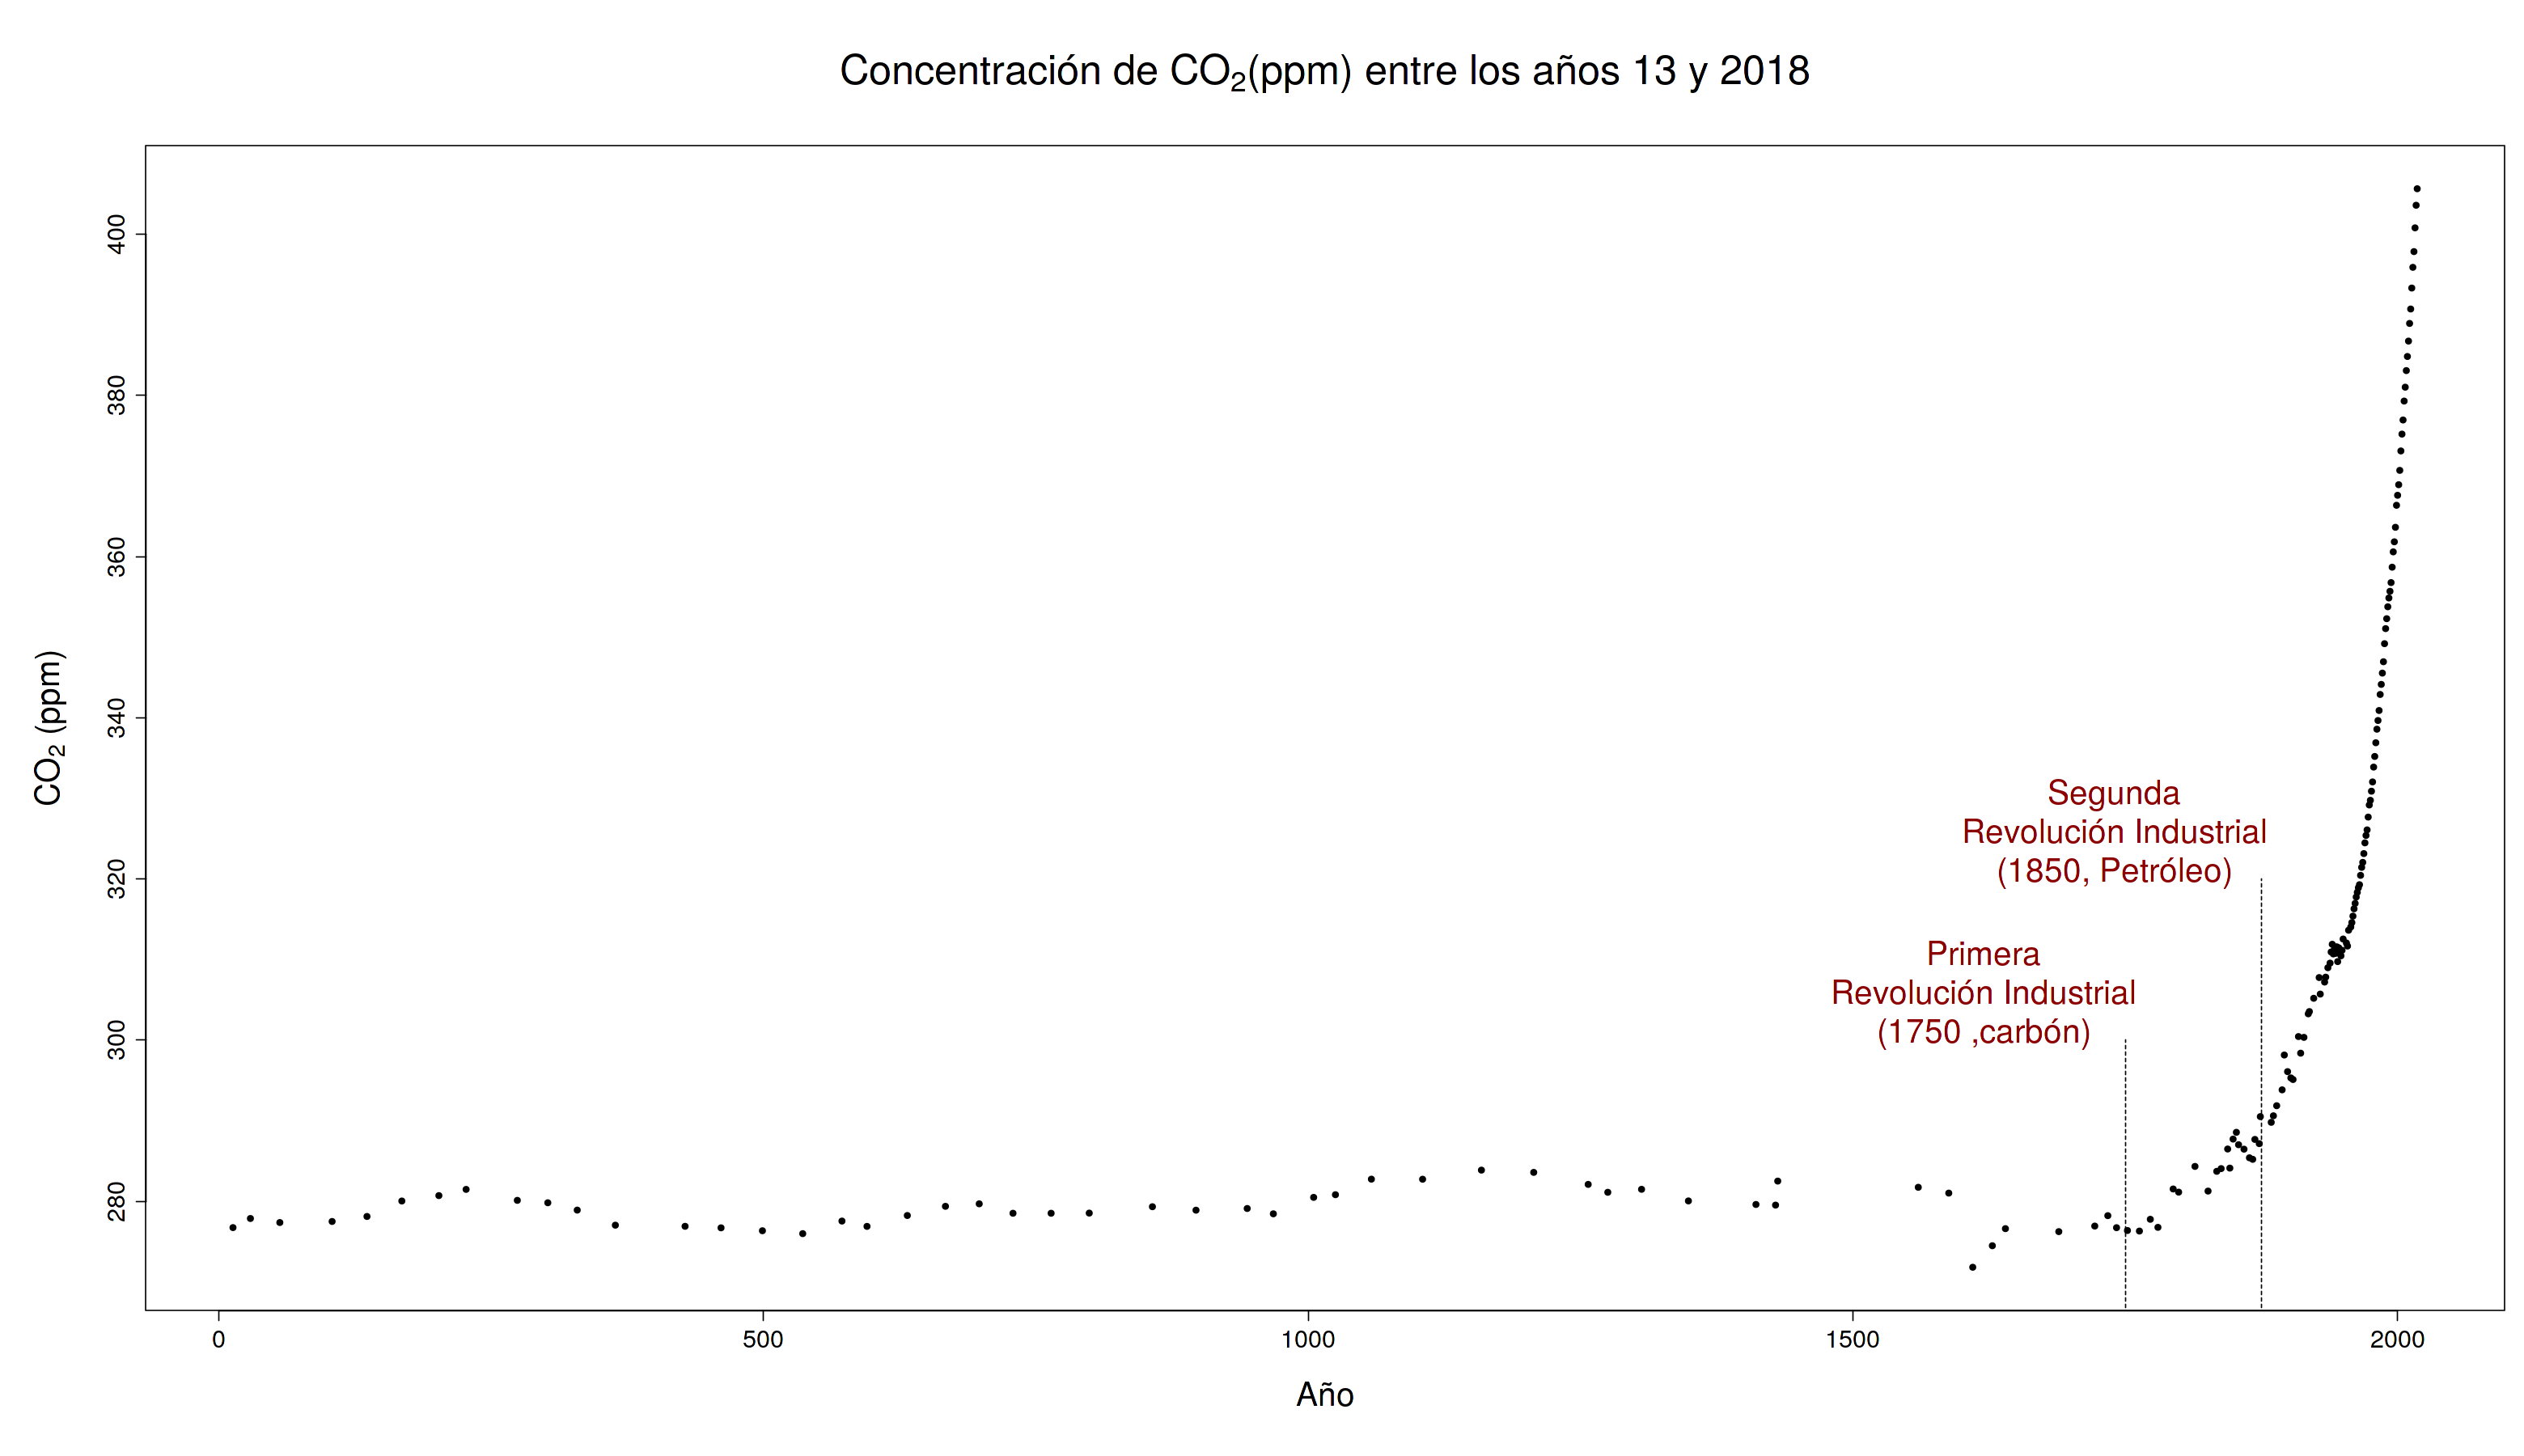

In [83]:
#PLOT CO2: se pueden hacer por capas (hay más cosas en el pdf)
fig(width = 26,heigth =15)
par(mar=c(7.5,7.5,7.5,1),mgp=c(4,1,0))#mar = márgenes ejes(der,izq,arr,ab); mgp = posición títulos
grafco2 <- plot(diox$Y, diox$CO2, xlab = "Año",
ylab = expression(paste("C",O[2]," (ppm)")), #símbolos raros para el subíndice
main = expression(paste("Concentración de ",CO[2],
"(ppm) entre los años 13 y 2018")), pch = 20, cex.axis = 1.5, cex.lab = 2,cex.main = 2.5, ) + 
#segmentos indicando el tiempo de las revoluciones industriales
segments(x0 = c(1750,1875), x1 = c(1750,1875),y0 = 0,y1 = c(300,320), lty = 2)
#texto de etiquetas dentro del gráfico (no lo use casi nunca)
text(x = c(1620,1740), y = c(306,326),  
     labels = c("Primera\nRevolución Industrial\n(1750 ,carbón)", "Segunda\nRevolución Industrial\n(1850, Petróleo)"),
    cex  = 2, col = "Red4")

Vemos que:
* El dióxido de carbono en atmósfera varía poco...hasta que pega un salto grande.
* Es esperable que haya una correlación positiva entre variables (crece la anomalía térmica cuando crece la concetración de $CO_2$ en atmósfera) ...

<div class="alert alert-block alert-success">
Desde 1950 la tasa de $CO_2$ aumentó considerablemente, así como también la tasa de obesidad de las personas. Hay una correlación positiva entre ambas, pero claramente no hay relación causal.
</div>

Una correlación positiva debería estar apoyada en algún modelo que venga de la teoría con otras bases experimentales: hay cosas que correlacionan y no tienen relación (já):

<div class="alert alert-block alert-danger">
    <center><b>Correlación no implica <i>causación</i></b></center>
</div>



### 2. Juntando los datasets

Ya vimos que la anomalía térmica de la NASA crece, así como también lo hace la concentración de $CO_2$. Vamos a ver si conseguimos graficar una variable respecto de la otra:

In [84]:
plot(at$TA, diox$CO2)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


* Obvio que hay un problema:
   * Las concentraciones de $CO_2$ tienen registros desde el año 13.
   * Las anomalías térmicas tienen registro desde el 1880...

* Tenemos que seleccionar los años en los que haya datos comunes:
   * Hay mil formas de hacerlo. 
   * Vamos a elegir una que es de manual, para esquivar ciertas complicaciones.
   
   
Primero seleccionamos los años comunes a ambos dataframes:

Seleccionamos años comunes a ***ambos*** dataframes:

In [85]:
Y.comunes <- intersect(at$Year, diox$Y ); Y.comunes

[1] 1884 1886 1889 1894 1896 1899 1902 1904 1909 1911 1914 1918 1919 1923 1928
[16] 1929 1933 1934 1936 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948
[31] 1949 1950 1953 1954 1955 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966
[46] 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
[61] 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
[76] 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
[91] 2012 2013 2014 2015 2016 2017

Ahora hay que seleccionar, uno por uno, las anomalías térmicas y las concentraciones de $CO_2$:
* usamos un bucle `for`, que vamos a ver luego.
* el bucle va a recorrer los años comunes, y va a elegir los valores que queremos de cada dataframe.
    * No es una forma estándar del mundo de los datos, porque puede ser lenta.
    * Hay funciones específicas de R, pero no queremos aprender mil comandos, sino que nos centramos en lo que tiene de general y común con otros lenguajes.

In [86]:
co2.comun <- vector(mode = "numeric", length = length(Y.comunes)) #valores co2 para años comunes
at.comun <- vector(mode = "numeric", length = length(Y.comunes)) #valores anomalía térmica 
for(i in 1:length(Y.comunes)){
co2.comun[i] <- diox$CO2[diox$Y == Y.comunes[i]]
at.comun[i] <- at$TA[at$Year == Y.comunes[i]]
}
co2.comun; at.comun; length(co2.comun) == length(at.comun)

[1] 289.81 290.62 291.87 293.84 298.16 296.10 295.32 295.12 300.45 298.39
[11] 300.35 303.27 303.55 305.20 307.77 305.72 307.21 307.82 308.99 309.56
[21] 310.94 311.90 310.70 311.29 310.77 311.59 309.75 311.46 310.75 310.47
[31] 311.15 312.55 312.06 311.68 313.64 314.04 314.59 315.39 316.30 316.97
[41] 317.76 318.34 318.91 319.29 320.45 321.44 322.06 323.15 324.48 325.40
[51] 326.09 327.68 329.18 329.76 330.89 332.04 333.88 335.20 336.90 338.58
[61] 339.66 340.90 342.89 344.14 345.54 346.95 349.19 351.06 352.29 353.77
[71] 354.86 355.69 356.77 358.68 360.58 361.83 363.63 366.36 367.60 368.91
[81] 370.69 373.10 375.19 376.94 379.29 381.01 383.07 384.82 386.73 388.92
[91] 390.71 393.31 395.88 397.83 400.78 403.58

[1] -0.28 -0.32 -0.11 -0.32 -0.11 -0.18 -0.30 -0.49 -0.48 -0.43 -0.16 -0.28
[13] -0.27 -0.24 -0.19 -0.35 -0.30 -0.14 -0.16 -0.03 -0.03  0.11  0.18  0.05
[25]  0.07  0.21  0.09 -0.07 -0.04 -0.11 -0.11 -0.19  0.07 -0.15 -0.14  0.04
[37]  0.07  0.03 -0.02  0.06  0.04  0.07 -0.20 -0.10 -0.05 -0.02 -0.07  0.07
[49]  0.03 -0.09  0.01  0.16 -0.08 -0.02 -0.11  0.17  0.06  0.16  0.27  0.33
[61]  0.13  0.31  0.16  0.12  0.18  0.33  0.41  0.28  0.44  0.41  0.22  0.24
[73]  0.31  0.44  0.33  0.47  0.62  0.40  0.40  0.54  0.62  0.61  0.53  0.67
[85]  0.62  0.64  0.52  0.63  0.70  0.57  0.61  0.64  0.73  0.86  0.99  0.90

[1] TRUE

#### Armamos un dataframe

In [87]:
correlatio <- data.frame(Y = Y.comunes, CO2 = co2.comun, AT = at.comun);
rm(Y.comunes, co2.comun, at.comun) #borra variables de la memoria

In [88]:
head(correlatio)

,Y,CO2,AT
,<int>,<dbl>,<dbl>
1,1884,289.81,-0.28
2,1886,290.62,-0.32
3,1889,291.87,-0.11
4,1894,293.84,-0.32
5,1896,298.16,-0.11
6,1899,296.10,-0.18


## 3. Ploteo de correlación - Viendo los datos *denserio*

In [91]:
gcor <- ggplot(data = correlatio) + 
geom_point(aes(x = CO2, y = AT, colour = "Mediciones")) + 
geom_smooth(aes(x = CO2, y = AT, colour = "Ajuste Lineal (Recta)"), method = "lm",formula = "y ~ x" ) + 
scale_colour_manual(values = c("Mediciones" = "Black", "Ajuste Lineal (Recta)" = "Blue"), name = NULL) + 
xlab(expression(CO[2] (ppm))) + ylab("Anomal. Térmica (°C)") + 
temajuan3 + 
theme(legend.position = c(0.1,0.8), legend.background = element_blank()) + 
guides(colour = guide_legend(override.aes = list(linetype = c(1,0), shape = c(NA, 16), size = c(1,2) ))) 

## 3. Ploteo de correlación - Viendo los datos *denserio*

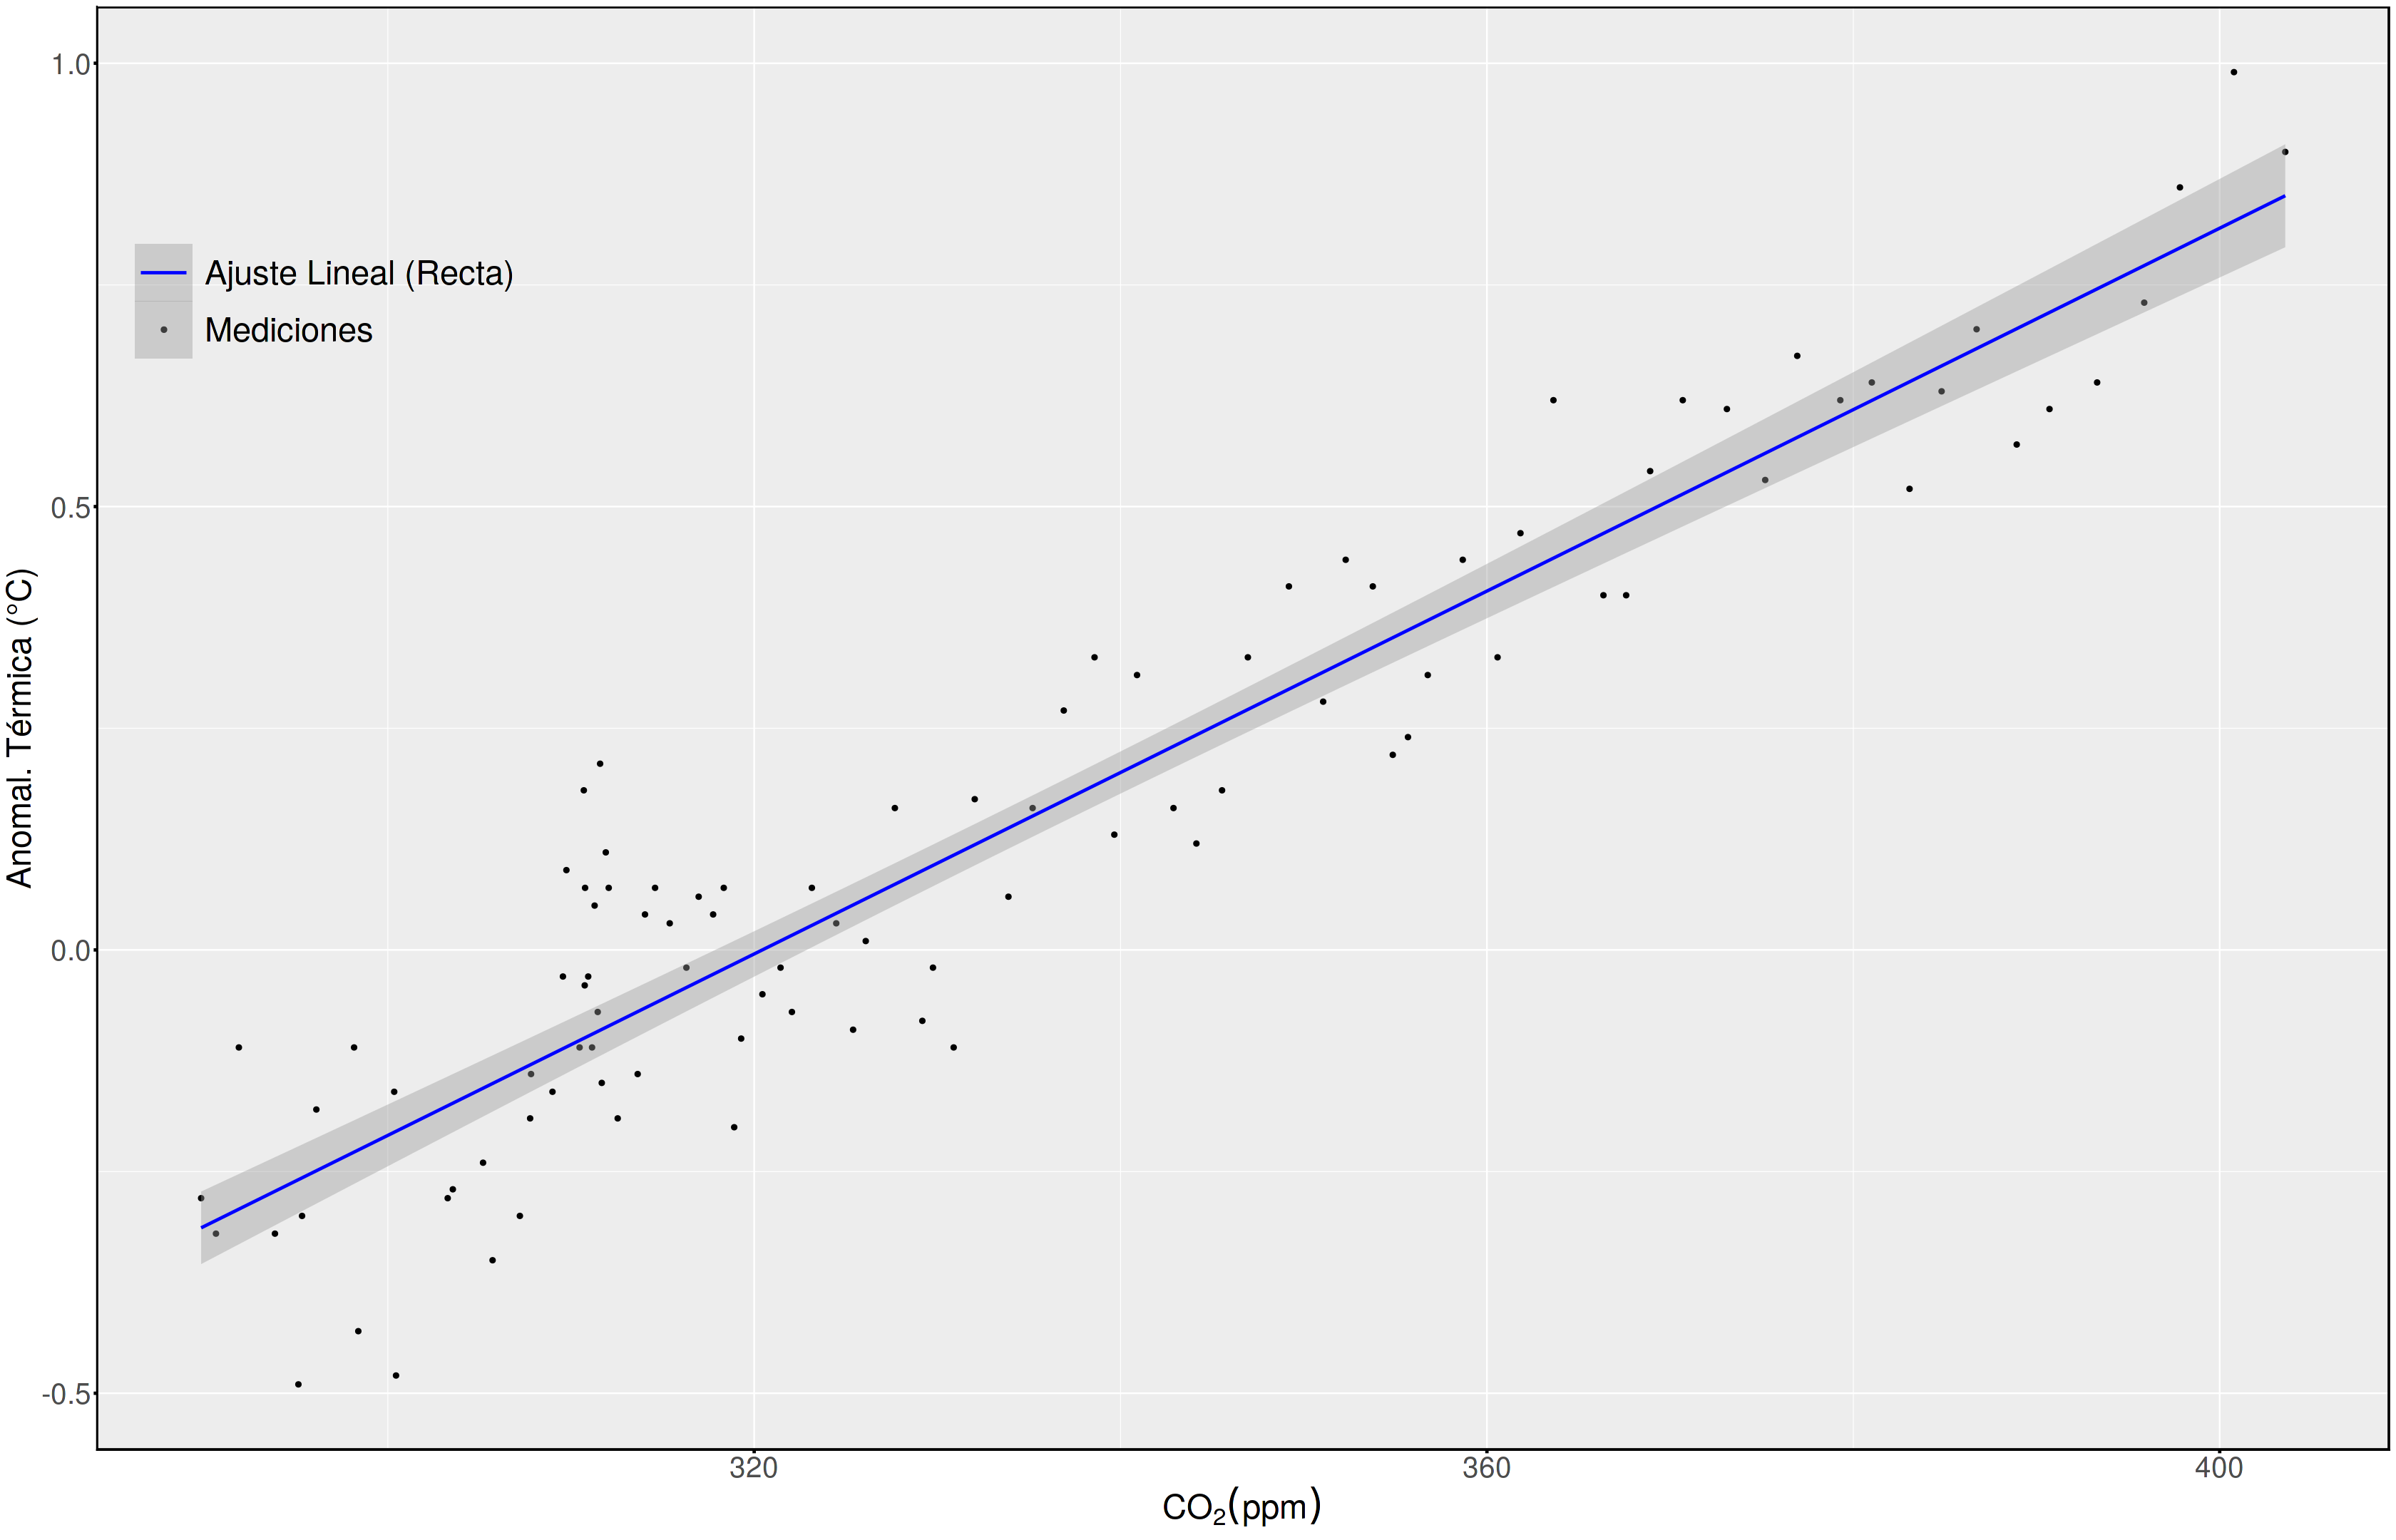

In [92]:
fig(width = 28,heigth = 18); show(gcor)

## * El que no ve correlación es porque no quiere.
* Los negadores del cambio climático van a aducir que correlación no implica causación, y errores y detalles por todos lados.
* También deberíamos encontrar correlación entre ser **negador** y tener unos buenos millones invertidos en una **petrolera**, pero no solo: una vez que hay un discurso andando, siempre hay giles que lo repiten sin ver nada.

Advierto:

* Este gráfico es una **muestra**, **no una prueba** del cambio climático, y dista kilómetros de lo que tiene que ser una investigación *denserio*, pero algo muestra.

* Reiteramos: se pueden poner mil peros al análisis que estamos haciendo, pero sólo con este análisis simple, ya podemos sospechar que algo hay...

### 4. Sobre el modelo de correlación....

Dijimos que había correlación (y la hay, no?) entre los datos de anomalía térmica y concentración de $CO_2$ en atmósfera. Con respecto a la causación:

<div class="alert alert-block alert-danger">
El efecto invernadero se refiere al comportamiento de ciertos gases en relación a la biósfera terrestre: el $CO_2$ (principalmente) en conjunto con otros gases, <i>absorbe y emite fotones IR</i> (radiaciones infrarrojas), lo cual es producto de sus orbitales moleculares.
    
Cuando la luz del Sol –cuyo espectro va desde el infrarrojo al ultravioleta– interactúa con la Tierra, la calienta. La Tierra absorbe muchas longitudes de onda, pero <i> emite </i> mayormente infrarrojo.


Los infrarrojos que salen de la Tierra interactuan con el $CO_2$, que los devuelve parcialmente hacia la Tierra, por lo que la radiación IR queda <i>atrapada en mayor grado</i> entre la superficie terrestre y la atmósfera. Este proceso se conoce como efecto invernadero.
</div>


### 4. Sobre el modelo de correlación

Hay correlación, ok, también hay un ***efecto causal***: buenas razones para no negar el cambio climático.

Ahora, la ***línea azul que trazamos es un modelo de correlación lineal, donde ajustamos una recta de la forma***:
$$\Delta T = c_1 \; + \; c_2 \; C_{CO_2}$$

donde $C_{CO_2}$ es a concentración de $CO_2 \; (ppm)$, y $\Delta T \; (°C)$ es la anomalía térmica.

La recta nos cuantifica la correlación con un modelo de datos que nosotros elegimos, y nos informa ***cuánto cambia la anomalía térmica dependiendo de la concentración de $CO_2$***.

### 4. Sobre el modelo de correlación - Ajustando una recta en R
Para obtener los valores del ajuste de la recta que cuantifica la correlación (les docentes usamos mal el término y decimos ajuste lineal ***siempre***, luego veremos que está un poco errado), vamos a usar muy a menudo un comando:

In [93]:
ajuste.recta <- lm(correlatio$AT ~ correlatio$CO2) # AT proporcional a c_1 + c_2 CO2
print(  ajuste.recta  )


Call:
lm(formula = correlatio$AT ~ correlatio$CO2)

Coefficients:
   (Intercept)  correlatio$CO2  
      -3.27870         0.01023  



* Abajo de `intercept` tienen el valor de la ordenada al origen $c_1$.
* Abajo de `correlatio$CO2` tienen el valor de la pendiente $c_2$.

### 4. Sobre el modelo de correlación
La ordenada al origen no nos interesa tanto acá, pero la pendiente es de $c_2 = 0.01023 ^o C / ppm$, o sea que, en nuestro modelo, por cada ***aumento*** en un ppm de $CO_2$ hay un ***aumento*** de 0.01023 °C en la temperatura media de la Tierra...decimos que la correlación es ***positiva***.

El objeto `ajuste.recta` tiene muchas cosas. Entre ellas destacamos:

In [94]:
ajuste.recta$coefficients[1] #ordenada al origen
ajuste.recta$coefficients[2] #pendiente

(Intercept) 
  -3.278704

correlatio$CO2 
    0.01023176

### 4. Sobre el modelo de correlación

In [40]:
summary.lm(ajuste.recta)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-3.27870403,0.1288909202,-25.43782,6.255983e-44
correlatio$CO2,0.01023176,0.0003844423,26.61454,1.489368e-45


Vemos que cada valor de parámetro tiene asociada una incerteza estadística (`Std. Error`), que es un $\sigma$ del modelo que utilizamos.

### 4. Sobre el modelo de correlación

In [41]:
summary.lm(ajuste.recta)$r.squared

[1] 0.8828418

el parámetro $R^2$ (`r.squared`) se llama *coeficiente de correlación de Pearson*, y mide"**cuánto de la variación de Y es explicada por la variación de X**" (en este caso Y es la anomalía térmica y X es la concentración de CO2).

El valor de $R^2 = 0.8828$ nos dice que el 88.28% de las variaciones  en la anomalía térmica *son explicadas* por las variaciones de la concentración de CO2 en nuestro modelo de recta. Es un número inusualmente alto para datos de ciencias ambientales.

## Cerrando

* Vimos cómo cargar datos de archivos de texto `.csv` con el comando `read.csv()`
* Vimos cómo hacer unos gráficos simples (luego charlaremos más)
* Vimos que a veces es necesario *arreglar datos*, como hicimos para buscar correlación entre variables.
* Nos preocupamos por el cambio climático, en caso de ser personas de bien.